# Clustering Algorithms 

## Farthest-first traversal

#### Rationale

The Farthest-First Traversal (FFT) algorithm is a clustering algorithm that is used to group data points into clusters based on their distance from one another. The basic idea behind FFT is to select a starting point and then repeatedly choose the farthest point from the current cluster until a specified number of clusters have been created.

The distance between two points is typically measured using the Euclidean distance metric, which calculates the distance between two points in n-dimensional space as the square root of the sum of the squares of the differences between their corresponding coordinates.

**Euclidian Distance**: we define the Euclidean distance between points v = (v1, ... , vm) and w = (w1, ... , wm) in m-dimensional space, denoted d(v, w):

$$
  d(v, w) = \sqrt{\sum_{i=1}^m  (v_i - w_i)^2}
$$


#### Implementation

Here's how the algorithm works:

1. Select a random data point as the starting point for the first cluster.
2. Find the point that is farthest from the first cluster and assign it to the second cluster.
3. Repeat step 2, but now find the point that is farthest from the first two clusters and assign it to the third cluster.
4. Continue this process until the desired number of clusters have been created.

Let's write it in Python:

In [1]:
import numpy as np
import pandas as pd

def farthest_first_traversal(X, k):
    """
    Implementation of Farthest-First Traversal clustering algorithm
    
    Parameters:
    X: pandas DataFrame, shape (n_samples, n_features)
        The input data to be clustered
    k: int
        The number of clusters to create
        
    Returns:
    centroids: array-like, shape (k, n_features)
        The k centroids chosen by the algorithm
    labels: array-like, shape (n_samples,)
        The cluster assignments for each data point
    """
    # Convert the input DataFrame to a NumPy array
    X = X.values
    
    # Choose a random point as the starting point
    start_point = np.random.choice(X.shape[0], size=1)
    
    # Initialize the set of centroids with the starting point
    centroids = X[start_point]
    
    # Initialize the set of cluster assignments
    labels = np.zeros(X.shape[0])
    
    # Repeat until k centroids have been chosen
    for i in range(1, k):
        # Calculate the distance between each point and the centroids
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        
        # Choose the point that is farthest from the existing centroids
        farthest_point = np.argmax(np.min(distances, axis=0))
        
        # Add the farthest point to the centroids
        centroids = np.vstack((centroids, X[farthest_point]))
        
    # Assign each point to the closest centroid
    for i in range(X.shape[0]):
        distances = np.sqrt(((X[i] - centroids)**2).sum(axis=1))
        labels[i] = np.argmin(distances)
    
    return centroids, labels

Now we can test the algorithm on a sample dataset. 

In [2]:
# load data from txt file
data = pd.read_csv("data/rosalind_ba8a.txt", delimiter=" ", header=None)

print(data.head())

      0    1     2     3
0   9.1  0.5   7.7  11.6
1   4.4  7.1  15.4   3.3
2   1.3  3.9  12.4  17.1
3  14.5  5.7   0.7   6.4
4   0.1  5.6  14.2   3.1


In [3]:
centroids, labels = farthest_first_traversal(data, 3)

# Print the centroids DataFrame
centroids_df = pd.DataFrame(data=centroids, columns=data.columns)
print(centroids_df)

     0     1     2     3
0  6.1  13.0   1.7  19.8
1  1.4  15.3  34.2   2.5
2  7.3  42.6   5.5   3.6


Just above is our centroids dataframe. We can now visualize the clusters to which data points have been assigned. Our input data has 4 features, it may be difficult to visualize the cluster assignments using a scatter plot. In this case, we can use a parallel coordinates plot, which plots each data point as a line spanning across all the features.

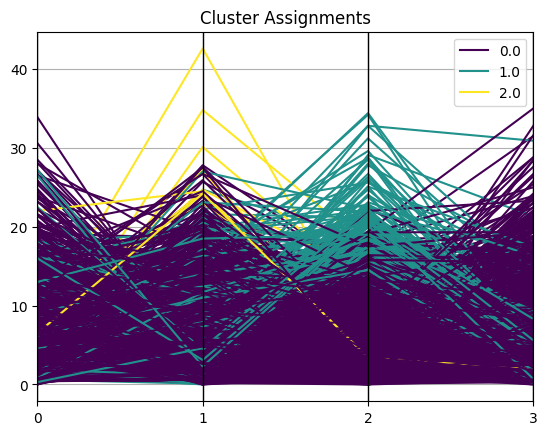

In [4]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Add the cluster assignments to the input data as a new column
data['Cluster'] = labels

# Create a parallel coordinates plot
parallel_coordinates(data, 'Cluster', colormap='viridis')
plt.title('Cluster Assignments')
plt.show()




#### Closing comments

The FFT algorithm is simple to implement and can be quite effective for data sets with well-separated clusters. However, it has some limitations. For example, the algorithm is sensitive to the initial starting point, and it may not work well with data sets that have overlapping clusters or clusters with varying densities. Additionally, the number of clusters must be specified in advance, which may not be known beforehand in some cases.